# Seek Market Analysis
#### Collaborators:
James Rutherford - s5132147 - james.rutherford@griffithuni.edu.au  
Zakaria Wardere - s5302830 - zakaria.wardere@griffithuni.edu.au

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1

Prepare the data and pre-process for future analysis.

## Importing the dataset and examining the first few rows of data.

In [2]:
df = pd.read_csv('data.csv')

C:\Users\jruth\AppData\Local\Temp\ipykernel_10980\1507164070.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [3]:
print("The dataset contains:", df.shape[0], " rows and ", df.shape[1], " columns.")
df.head(5)

The dataset contains: 318477  rows and  13  columns.


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


## Checking the data time range of the dataset.

In [4]:
dateRange = df.sort_values('Date')['Date'].dropna().unique()
startDate = dateRange[0]
endDate = dateRange[-1]
print("The dataset contains data from ", startDate, " to ", endDate)

The dataset contains data from  2018-10-01T00:00:00.000Z  to  2019-03-13T00:00:00.000Z


## Checking for unique values in each column.

In [5]:
print("The dataset contains the following unique values for each column:")
for column in df.columns:
    print(column, "->",df[column].nunique())

The dataset contains the following unique values for each column:
Id -> 318477
Title -> 168065
Company -> 40628
Date -> 163
Location -> 65
Area -> 19
Classification -> 30
SubClassification -> 338
Requirement -> 234287
FullDescription -> 250901
LowestSalary -> 11
HighestSalary -> 11
JobType -> 4


## Checking for total values in each column.

In [6]:
print("The dataset contains the following number of values for each column:")
for column in df.columns:
    print(column, "->",df[column].count())

The dataset contains the following number of values for each column:
Id -> 318477
Title -> 318477
Company -> 306473
Date -> 318477
Location -> 197229
Area -> 122658
Classification -> 197229
SubClassification -> 197229
Requirement -> 318470
FullDescription -> 302302
LowestSalary -> 318477
HighestSalary -> 318477
JobType -> 302379


## Dataset Characteristics
The dataset contains 318477 job postings from the Seek job search website. The timeframe of the job postings was between 01/10/2018 - 13/03/2019. Each job posting consists of 13 attributes, upon initial investigation of the dataset, we can see that there are missing values in a number of the columns. Also there was a data type warning flagged when loading the in dataset for the ID, Location, Area, Classification and Subclassification columns (0, 4, 5, 6, 7). This will be investigated further in the next section, along with the missing values.

The 13 attributes that make up each job, the number of unique values and number of total values are as follows:
| Attribute | No. of Variations | No. of Total Values |
| --- | --- | --- |
| ID | 318477 | 318477 |
| Title | 168065 | 318477 |
| Company | 40628 | 306473 |
| Date | 163 | 318477 |
| Location | 65 | 197229 |
| Area | 19 | 122658 |
| Classification | 30 | 197229 |
| Sub-Classification | 338 | 197229 |
| Requirements | 234287 | 318470 |
| Full Description | 250901 | 302302 |
| Lowest Salary | 11 | 318477 |
| Highest Salary | 11 | 318477 |
| Job Type | 4 | 302379 |

- The **ID** column has 318,477 unique values and 318,477 total values. Each ID is specific to a job posting on Seek, making this column mostly useless for the index. Therefore, it will be dropped in the next section. (Type: Identifier)
- The **Title** column's high variation indicates diverse job titles, which may prove analysis on this variable fruitless as the variations arise from similar jobs listed under different titles by different companies. (Type: Categorical)
- The **Company** column has high variation and this suggests a wide range of companies posting job ads, useful for analyzing job postings across companies or identifying popular jobs by location or sector. (Type: Categorical)
- The **Date** column specifies the job posting date, useful for analyzing trends over time. However, the limited timeframe restricts long-term trend analysis. (Type: Date/Time)
- The **Location** column has 65 unique values and 197,229 total values. It specifies job locations, useful for geographical analysis to determine job market sizes in various locations. (Type: Categorical)
- The **Area** column has 19 unique values and 122,658 total values. It represents sub-regions within main locations, allowing for granular geographical analysis and understanding job distribution within broader regions. However, there is a significant amount of data missing and the area may only be present in larger cities. (Type: Categorical)
- The **Classification** column has 30 unique and categorizes jobs into different sectors, vital for sector-wise analysis to identify which sectors have the most job postings. (Type: Categorical)
- The **Sub-Classification** column has 338 unique values and 197,229 total values. It provides detailed categorization within main classifications, allowing deeper analysis of specific job roles within broader sectors. (Type: Categorical)
- The **Requirements** column has 234,287 unique values and 318,470 total values. It lists job requirements, useful for revealing common skills and qualifications demanded by employers, valuable for job seekers and educational institutions. (Type: Text)
- The **Full Description** column has 250,901 unique values and 302,302 total values. It contains detailed job descriptions, providing insights into job roles, responsibilities, and specific job-related terms and phrases. (Type: Text)
- The **Lowest Salary** and **Highest Salary** columns have 11 unique values and 318,477 total values. It shows the minimum/maximum salary offered, helping to understand lower/upper bounds of compensation to analyze salary disparities. (Type: Numerical)
- The **Job Type** column has 4 unique values and categorizes jobs by type (e.g., full-time, part-time, contract), useful for understanding the distribution of employment types and analyzing potential relationships between salaries and job types. (Type: Categorical)

## Data Prep and Preprocessing

Removing the Id column as it is not needed for the analysis.

In [7]:
print('Removing the Id column changs the df shape from: ', df.shape[1], ' to ', df.drop('Id', axis=1).shape[1])
df.drop('Id', axis=1, inplace=True)

Removing the Id column changs the df shape from:  13  to  12


### Checking data types

In [8]:
df.dtypes

Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

The Date column is currently an object data type, this will be converted to a datetime data type for further analysis and more ease of use.

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].dtype

datetime64[ns, UTC]

### Adding Salary Range Column
This is done to assist in analysis further down the line.

In [10]:
df['SalaryRange'] = df['HighestSalary'] - df['LowestSalary']
df[['HighestSalary', 'LowestSalary', 'SalaryRange']].head()

,HighestSalary,LowestSalary,SalaryRange
0,30,0,30
1,30,0,30
2,30,0,30
3,30,0,30
4,30,0,30


## Check Duplicates and Missing Data

### Duplicates

In [11]:
# Check for duplicates in each column
dup_count = df[df.duplicated()].shape[0]
print("The dataset contains ", dup_count, " duplicates.")

The dataset contains  8607  duplicates.


This is a small enough amount of samples in comparison to the size of the dataset that you can't conclusively say it is duplicates. Companies could be advertising the same job multiple times. As a result, these will be left as is.

### Missing Data

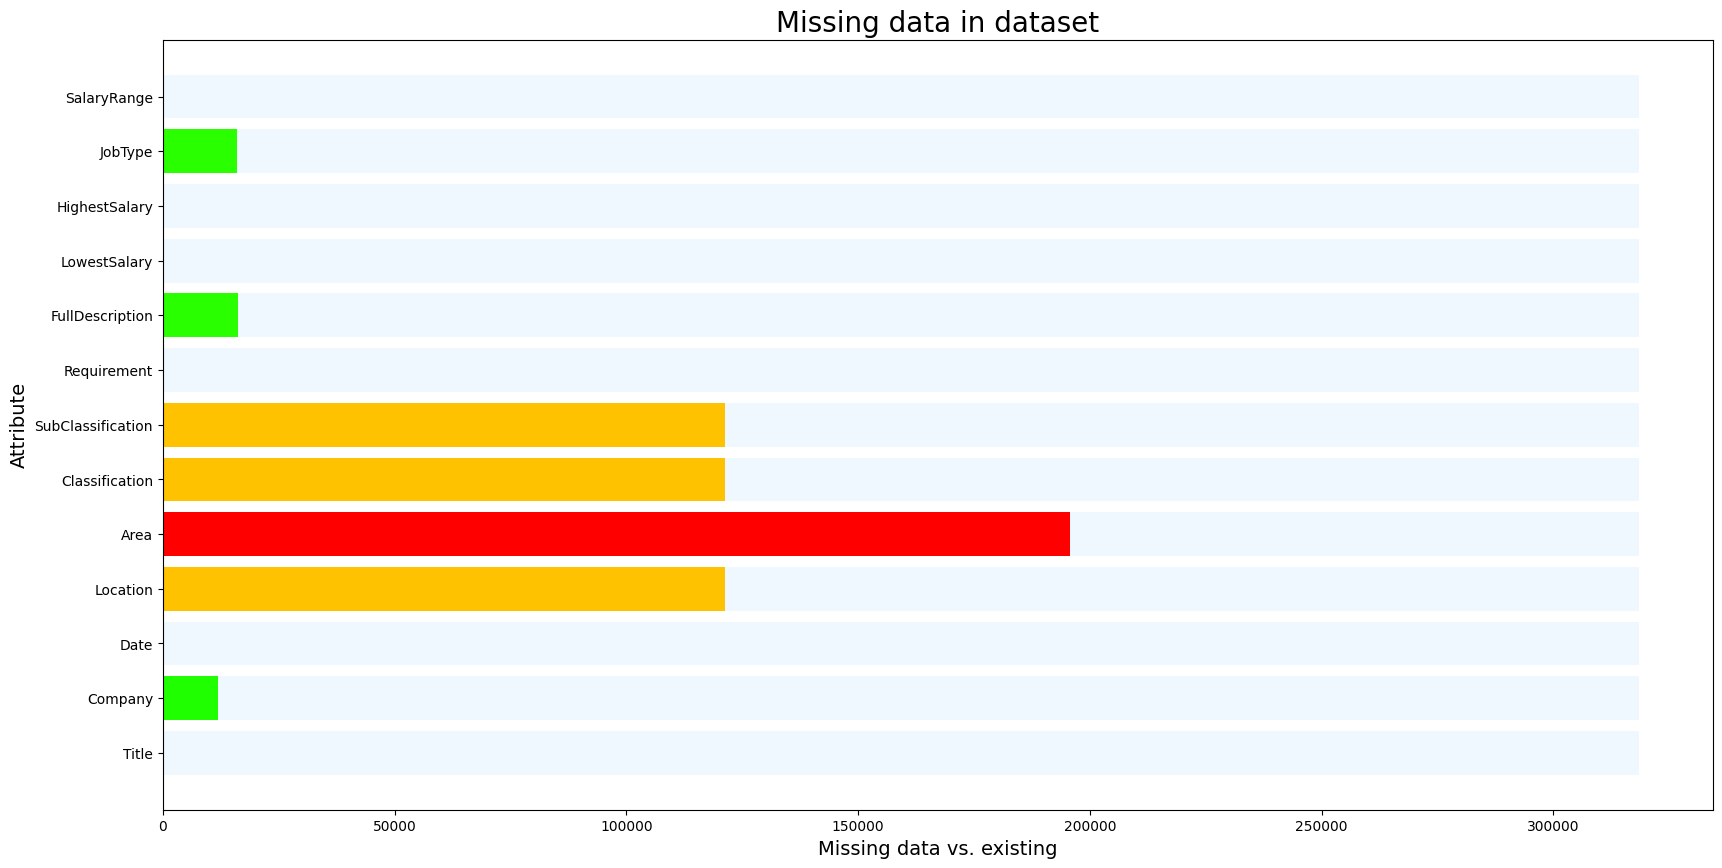

In [12]:
def get_gradient_color(value, max_value):
    normalized_value = value / max_value
    red = min(1, 2 * normalized_value)  # Gradient black -> red
    green = min(1, 2 * (1 - normalized_value))  # Gradient black -> green
    return (red, green, 0)

nulls = df.isnull().sum()
cols = [get_gradient_color(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20, 10))
plt.barh(df.columns.values, total_data, color='aliceblue')

for idx, (column, null_count, color) in enumerate(zip(df.columns.values, nulls, cols)):
    plt.barh(column, null_count, color=color, edgecolor='none')

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show()

### Find the proportion of missing data in each column

In [13]:
total_jobs = df.shape[0]
print('Missing data in attributes:')
for column, null_count in zip(df.columns.values, nulls):
    if null_count > 0:
        print(column, '->', round(null_count / total_jobs * 100, 3), '%')

Missing data in attributes:
Company -> 3.769 %
Location -> 38.071 %
Area -> 61.486 %
Classification -> 38.071 %
SubClassification -> 38.071 %
Requirement -> 0.002 %
FullDescription -> 5.079 %
JobType -> 5.055 %


### Observations
- There is a significant amount of missing data in this set. 
- The columns with the most missing data are the Area, Location, Classification, and Sub-Classification columns. 
- Area appears to be a more specific subset of the Location column and as such, it is not surprising that it has a significant amount of missing data. This is because it appears to refer to Area's within a Location (i.e.: a surburb within a city), and this would only really be applicable to the larger Locations in Australia where such a thing is possible. This will be confirmed or debunked later. 
- The Classification and Sub-Classification columns are also missing a significant amount of data, which is surprising as these are the columns that are used to categorize the job postings.
- It is worth noting that it is strange that Location, Classification and SubClassification have the same percentage of missing data. This could be due to remote working jobs being uncategorised.

### Investigation missing area

In [14]:
df_missing = df[df['Area'].notnull() & df['Location'].notnull()]
print("The dataset contains ", df_missing['Location'].nunique(), " unique values where both Area and Location columns are missing.")
print(df_missing['Location'].unique())

The dataset contains  4  unique values where both Area and Location columns are missing.
['Sydney' 'Brisbane' 'Melbourne' 'Perth']


### Observations
- This confirms the hypothesis I posed before where the Area column is only present in larger cities where there are suburbs. This is why there is a significant amount of missing data in this column.

### Investigating missing Location, Classification, and Sub-Classification

C:\Users\jruth\AppData\Local\Temp\ipykernel_10980\2707101635.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(missing_data_counts.index.strftime('%Y-%m-%d')[::7]))


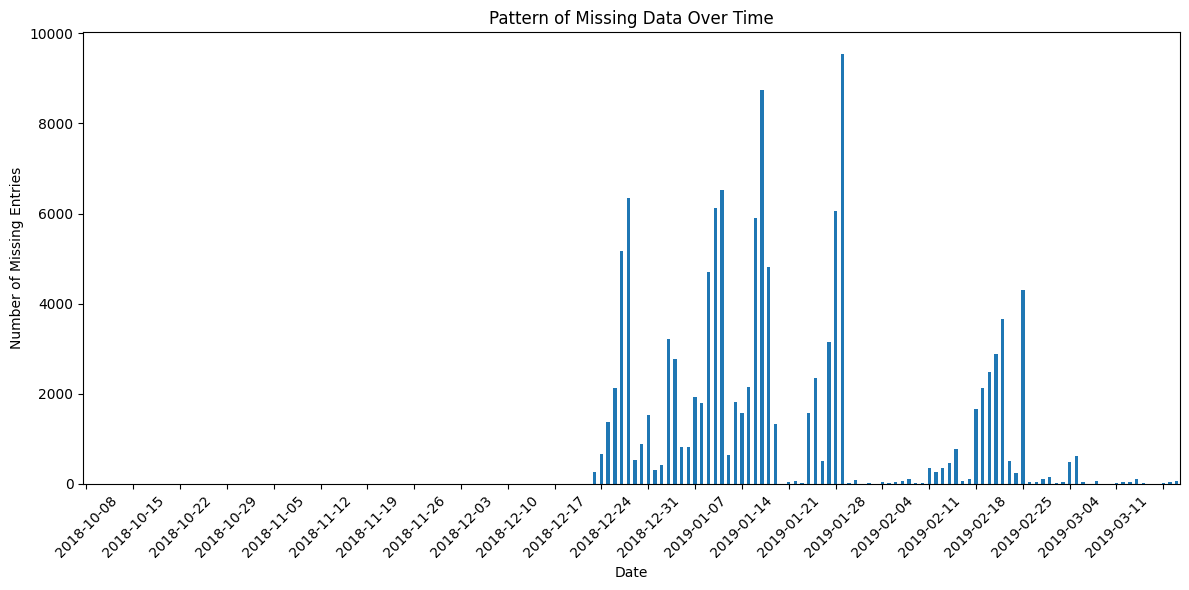

In [15]:
# Identify missing values in 'Location', 'Classification', and 'SubClassification' and check if they are the same rows
missing_location = df['Location'].isna()
missing_classification = df['Classification'].isna()
missing_subclassification = df['SubClassification'].isna()
same_missing = missing_location & missing_classification & missing_subclassification

missing_data_dates = df[same_missing]['Date']
missing_data_counts = missing_data_dates.value_counts().sort_index()

full_date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())
missing_data_counts = missing_data_counts.reindex(full_date_range, fill_value=0)

plt.figure(figsize=(12, 6))
missing_data_counts.plot(kind='bar')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(missing_data_counts.index.strftime('%Y-%m-%d')[::7]))

plt.xlabel('Date')
plt.ylabel('Number of Missing Entries')
plt.title('Pattern of Missing Data Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Oberservations
- Interestingly, the missing data in these 3 columns begins after a certain date which could suggest that something changed in how the data stored on Seek was recorded. This could be due to a change in the website or a change in the way the data was stored. Alternately, it could be due to a change in the way the data was collected by the scraper or even purely just a coincidence.
- These missing values will be removed from the dataset as they are not useful for analysis. This is not a major issue as there is still a significant amount of data left.
- Additionally, if the dataframe was cut to only include data before the missing values began, it would be cutting out a significant amount of data which would not be beneficial for the analysis and hinder and temporal pattern mining essentially useless as there would only be approx 2 months of data to work with.

In [16]:
# Remove missing values from df and add to new dataframe
new_df = df.dropna()
print("The original dataset contains ", df.shape[0], " rows and ", df.shape[1], " columns.")
print("The new dataset contains ", new_df.shape[0], " rows and ", new_df.shape[1], " columns.")
print('Number of missing values remaining in each attribute for the new dataframe:')
for column in new_df.columns:
    print(column, '->', round(new_df[column].isna().sum() / total_jobs * 100, 3), '%')

The original dataset contains  318477  rows and  13  columns.
The new dataset contains  111109  rows and  13  columns.
Number of missing values remaining in each attribute for the new dataframe:
Title -> 0.0 %
Company -> 0.0 %
Date -> 0.0 %
Location -> 0.0 %
Area -> 0.0 %
Classification -> 0.0 %
SubClassification -> 0.0 %
Requirement -> 0.0 %
FullDescription -> 0.0 %
LowestSalary -> 0.0 %
HighestSalary -> 0.0 %
JobType -> 0.0 %
SalaryRange -> 0.0 %


### Investigate outliers in HighestSalary

In [17]:
# Plot salary range by location
highest_salary_jobs = df[df['HighestSalary'] > 900]
highest_salary_jobs.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange
22979,General Manager,AIMS International Executive Search,2018-10-05 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,• Specially FMCG Products Experience • Must ha...,<ul>\n <li><strong>Specially FMCG P...,200,999,Full Time,799
22980,Chief Operating Officer,AIMS International Executive Search,2018-10-05 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,CEO & General Management,COO & MD,Automotive Aftermarket Products • ASX Business...,<ul>\n <li><strong>Automotive After...,200,999,Full Time,799
22981,Managing Director,AIMS International Executive Search,2018-10-05 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,CEO & General Management,CEO,• Base Salary to $280K plus Bonus • Property a...,<ul>\n <li><strong>Base Salary to $...,200,999,Full Time,799
22982,CHIEF INFORMATION OFFICER,Hender Consulting,2018-10-04 00:00:00+00:00,West Gippsland & Latrobe Valley,NaN,CEO & General Management,General/Business Unit Manager,Pivotal IT leadership role with well establish...,<p><strong>Latrobe Health Services</strong></p...,200,999,Full Time,799
22983,CHIEF INFORMATION OFFICER,Hender Consulting,2018-10-04 00:00:00+00:00,Bairnsdale & Gippsland,NaN,CEO & General Management,General/Business Unit Manager,Pivotal IT leadership role with well establish...,<p><strong>Latrobe Health Services</strong></p...,200,999,Full Time,799


### Observations
- Data must only go to 999k and anything over this value must be stored as 999k.
- This makes sense as the positons appears to be very high level and salary would be dependant on experience and qualifications. Often these sorts of high level positions could have a salary of well and truly over 999k and so they will not be removed from the dataset.

In [18]:
df.to_csv('data_cleaned.csv', index=False)

## Data Preprocessing Summary
During this section, the data was cleaned and preprocessed so that further exploratory analysis could be done with ease. Data cleaning is crucial in analysis as it ensures that the data is accurate and reliable. The following steps were taken to prepare the data for further analysis:  
### **Data Types:**
- Converted the Date column to a datetime data type for further analysis.  
- Everything else was as it should be.
### **Attributes:**
- The ID column was removed as it was not needed for analysis.
- A Salary Range column was added to assist in analysis.  
### **Duplicate Data:**
- Checked for duplicate data and found 8607 duplicate rows which have not been removed. This was justified as companies could be advertising the same job multiple times and such a small number of duplicates would not significantly affect the analysis.  
### **Missing Data:**
- Area contianed a significant amount of missing data which was expected as it appears to be a more specific subset of the Location column and would only be applicable to larger Locations in Australia.
- Classification, Sub-Classification, Location also contained large amounts of missing data. This was surprising as Classification and Sub-Classification are used to describe the job posting.
- The missing data was removed from the data set as there was still a significant amount of data left after removal that meaningful analysis could be done on.  
### **Outlier Analysis:**
- Investigated the Highest Salary column for outliers and found that the highest salary was 999k. This was deemed not an outlier and will not be removed as the column appeared to have a hard cap of 999k.

## Hypothesis
- We are expecting the job market to be quite diverse with a large number of job postings in a variety of sectors. However, we are expecting the IT sector to have the most job postings as it is a rapidly growing sector in Australia. Additionally we are anticipating the Trade sector to have a large number of job postings as it is a sector that is always in demand.
- We are also expecting the job market to be quite competitive with a large number of job postings in the major cities such as Sydney, Melbourne, Perth and Brisbane - particularly along the east coast of Australia.
- Due to more jobs in the major cities, we would expect higher salaries to match with the competitive nature.
- We are expecting the IT, Health, Management and Consultancy sectors to be the highest performing in terms of average salaries.